In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

import pims

import matplotlib.ticker as ticker

from skimage import filters, util
from scipy import ndimage
from ipywidgets import interact, IntSlider




Frame([[525, 524, 587, ..., 516, 532, 509],
       [531, 594, 514, ..., 603, 518, 516],
       [557, 619, 549, ..., 599, 558, 551],
       ...,
       [498, 537, 525, ..., 663, 559, 560],
       [548, 529, 576, ..., 560, 545, 484],
       [506, 502, 529, ..., 524, 582, 484]], dtype=uint16)
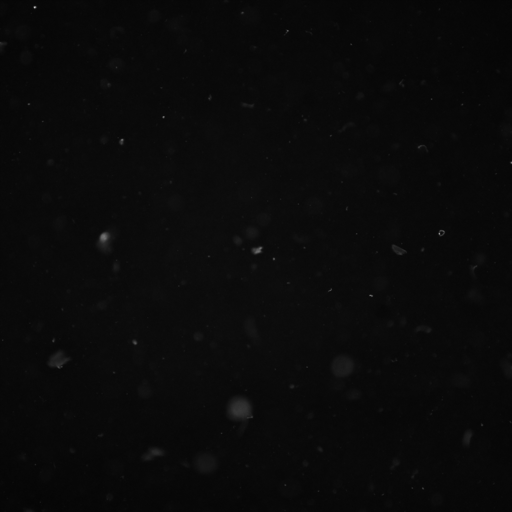

In [2]:
frames = pims.ImageSequence('/Users/scliu/Dropbox (Personal)/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/fig_4/cell_eater_1/Pos0/*.tif')
video = pims.Video('/Users/scliu/Dropbox (Personal)/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_4/image_slices/cell_eater_bf.avi')
cy5_frames = frames[1::3]
cy5_frames[0]

In [3]:
import numpy as np
np.__config__.show()


Build Dependencies:
  blas:
    detection method: pkgconfig
    found: true
    include directory: /usr/local/include
    lib directory: /usr/local/lib
    name: openblas64
    openblas configuration: USE_64BITINT=1 DYNAMIC_ARCH=1 DYNAMIC_OLDER= NO_CBLAS=
      NO_LAPACK= NO_LAPACKE= NO_AFFINITY=1 USE_OPENMP= SANDYBRIDGE MAX_THREADS=3
    pc file directory: /usr/local/lib/pkgconfig
    version: 0.3.23.dev
  lapack:
    detection method: internal
    found: true
    include directory: unknown
    lib directory: unknown
    name: dep4548835888
    openblas configuration: unknown
    pc file directory: unknown
    version: 1.26.4
Compilers:
  c:
    args: -fno-strict-aliasing
    commands: clang
    linker: ld64
    linker args: -fno-strict-aliasing
    name: clang
    version: 14.0.0
  c++:
    commands: clang++
    linker: ld64
    name: clang
    version: 14.0.0
  cython:
    commands: cython
    linker: cython
    name: cython
    version: 3.0.8
Machine Information:
  build:
    cpu: 

In [4]:
len(cy5_frames)

325

Frame([[1367, 1528, 1432, ..., 1369, 1536, 1326],
       [1480, 1544, 1546, ..., 1588, 1513, 1433],
       [1383, 1553, 1668, ..., 1583, 1544, 1302],
       ...,
       [1528, 1509, 1592, ..., 1619, 1530, 1387],
       [1490, 1648, 1497, ..., 1460, 1588, 1488],
       [1327, 1499, 1520, ..., 1565, 1454, 1435]], dtype=uint16)
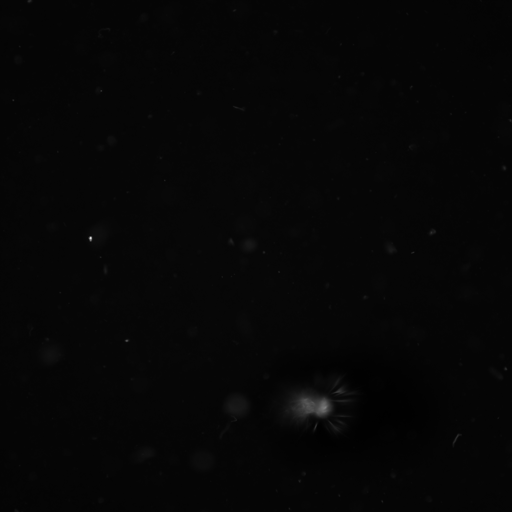

In [5]:
cy5_frames[103]

In [6]:


def preprocess_single_image(img, min_size, max_size):
    # Use Otsu's method to determine the threshold
    threshold_value = filters.threshold_otsu(img)
    # Apply the threshold to binarize the image
    img = img > threshold_value  
    # Perform binary dilation
    ndimage.binary_dilation(img, output=img)
    ndimage.binary_dilation(img, output=img)
    # Label the connected components in the image
    labels, _ = ndimage.label(img)
    # Filter the components based on their size
    size = np.bincount(labels.ravel())
    mask_size = (size > min_size) & (size < max_size)
    mask_size[0] = 0
    img = mask_size[labels]
    return img

min_size = 200  # adjust as needed
max_size = 5000  # adjust as needed

# List comprehension for sequential processing
frames_cy5_processed = [preprocess_single_image(img, min_size, max_size) for img in cy5_frames]


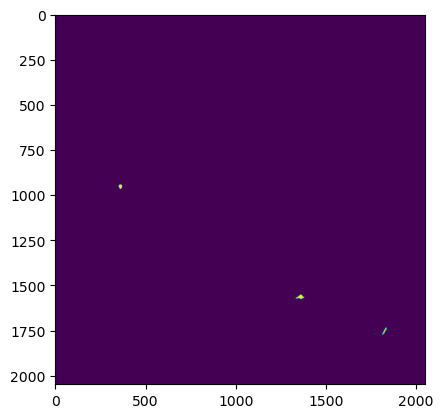

In [7]:
plt.imshow(frames_cy5_processed[103]);

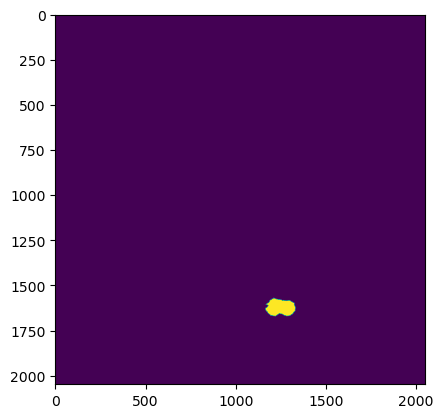

In [8]:

def preprocess_single_image(img, min_size, max_size):
    # Use Otsu's method to determine the threshold
    threshold_value = filters.threshold_otsu(img)
    # Apply the threshold to binarize the image
    img = img > threshold_value  
    # Perform binary dilation
    ndimage.binary_dilation(img, output=img)
    ndimage.binary_dilation(img, output=img)
    # Label the connected components in the image
    labels, _ = ndimage.label(img)
    # Filter the components based on their size
    size = np.bincount(labels.ravel())
    mask_size = (size > min_size) & (size < max_size)
    mask_size[0] = 0
    img = mask_size[labels]
    return img

min_size = 3000  # adjust as needed
max_size = 500000  # adjust as needed

# Only process the first image slice
img = cy5_frames[103]
processed_img = preprocess_single_image(img, min_size, max_size)
plt.imshow(processed_img);

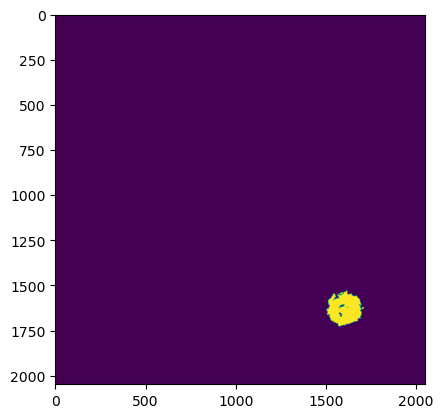

In [9]:

def preprocess_single_image(img, min_size, max_size):
    # Calculate thresholds using Otsu's and Triangle methods
    threshold_otsu = filters.threshold_otsu(img)
    threshold_triangle = filters.threshold_triangle(img)
    # Use a weighted average of both thresholds
    threshold_value = 0.20 * threshold_otsu + 0.8 * threshold_triangle
    # Apply the threshold to binarize the image
    img = img > threshold_value   
    # Perform binary dilation
    ndimage.binary_dilation(img, output=img)
    ndimage.binary_dilation(img, output=img)
    # Label the connected components in the image
    labels, _ = ndimage.label(img)
    # Filter the components based on their size
    size = np.bincount(labels.ravel())
    mask_size = (size > min_size) & (size < max_size)
    mask_size[0] = 0
    img = mask_size[labels]
    return img

min_size = 11300  # adjust as needed
max_size = 500000  # adjust as needed

# Only process the first image slice
img = cy5_frames[10]
processed_img = preprocess_single_image(img, min_size, max_size)
plt.imshow(processed_img);

In [10]:

def preprocess_images(img, min_size, max_size):
    # Calculate thresholds using Otsu's and Triangle methods
    threshold_otsu = filters.threshold_otsu(img)
    threshold_triangle = filters.threshold_triangle(img)
    # Use a weighted average of both thresholds
    threshold_value = 0.20 * threshold_otsu + 0.8 * threshold_triangle
    # Apply the threshold to binarize the image
    img = img > threshold_value   
    # Perform binary dilation
    ndimage.binary_dilation(img, output=img)
    ndimage.binary_dilation(img, output=img)
    # Label the connected components in the image
    labels, _ = ndimage.label(img)
    # Filter the components based on their size
    size = np.bincount(labels.ravel())
    mask_size = (size > min_size) & (size < max_size)
    mask_size[0] = 0
    img = mask_size[labels]
    # Calculate aster size as the size of the largest connected component
    aster_size = size[mask_size].max() if mask_size.any() else 0
    return img, aster_size

min_size = 12000  # adjust as needed
max_size = 500000  # adjust as needed

# Process all image slices
frames_processed, aster_sizes = zip(*[preprocess_images(img, min_size, max_size) for img in cy5_frames])


In [11]:
def preprocess_images(img, min_size, max_size):
    from skimage import filters
    from scipy import ndimage
    import numpy as np
    # Calculate thresholds using Otsu's and Triangle methods
    threshold_otsu = filters.threshold_otsu(img)
    threshold_triangle = filters.threshold_triangle(img)
    # Use a weighted average of both thresholds
    threshold_value = 0.20 * threshold_otsu + 0.8 * threshold_triangle
    # Apply the threshold to binarize the image
    img = img > threshold_value   
    # Perform binary dilation
    ndimage.binary_dilation(img, output=img)
    ndimage.binary_dilation(img, output=img)
    # Label the connected components in the image
    labels, _ = ndimage.label(img)
    # Filter the components based on their size
    size = np.bincount(labels.ravel())
    mask_size = (size > min_size) & (size < max_size)
    mask_size[0] = 0
    img = mask_size[labels]
    # Calculate aster size as the size of the largest connected component
    aster_size = size[mask_size].max() if mask_size.any() else 0
    return img, aster_size


min_size = 12000  # adjust as needed
max_size = 500000  # adjust as needed


In [13]:
# Function to plot a frame
def plot_frame(i):
    plt.imshow(frames_processed[i], cmap='gray')
    plt.show()

# Interactive widget to change frame
interact(plot_frame, i=IntSlider(min=0, max=len(frames_processed)-1, step=1, value=0));


interactive(children=(IntSlider(value=0, description='i', max=324), Output()), _dom_classes=('widget-interact'…

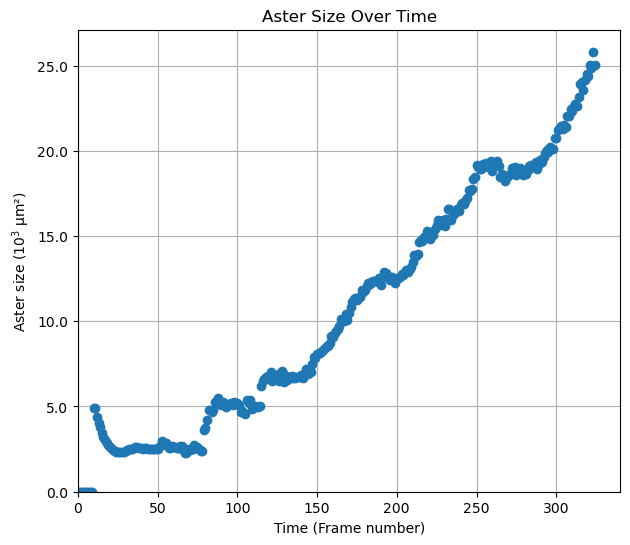

In [14]:
time = range(len(aster_sizes))

area_per_pixel = 0.43**2  # µm²


aster_sizes_um = [size * area_per_pixel for size in aster_sizes]

fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(time, aster_sizes_um, 'o')
ax.set_title("Aster Size Over Time")
ax.set_xlabel("Time (Frame number)")
ax.set_ylabel("Aster size ($10^3$ µm²)")
ax.grid(True)

# Create your custom scientific formatter
f = lambda x, pos: f'{x * 1e-3:.1f}'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(f))

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

plt.show()

In [23]:
len(aster_sizes)/6

54.166666666666664

In [24]:
time_minutes = time = range(54)

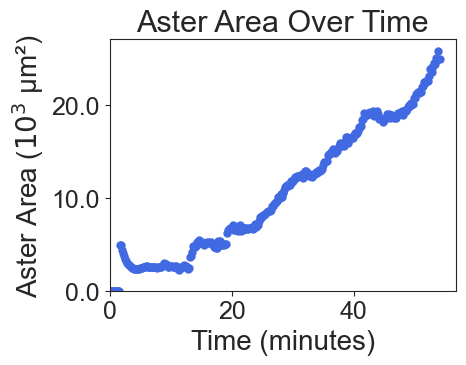

In [27]:


# Set the style of seaborn for prettier plots
sns.set_style('ticks')

# Set larger font sizes
plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels

# Create time variable with time / 6
time = [t / 6 for t in range(len(aster_sizes_um))]

fig, ax = plt.subplots(figsize=(5, 4))

# Original data
ax.plot(time, aster_sizes_um, 'o', color='royalblue', markersize=5)

# Titles and labels
ax.set_title("Aster Area Over Time")
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Aster Area ($10^3$ µm²)")

# Create your custom scientific formatter
f = lambda x, pos: f'{x * 1e-3:.1f}'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(f))

# Set x and y axis limits
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()
